In [1]:
#importing necessary libaray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore unncessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data file
df_games = pd.read_csv("../dataset/games.csv")
df_test = pd.read_csv("../dataset/test.csv")
df_train = pd.read_csv('../dataset/train.csv')
df_turns = pd.read_csv('../dataset/turns.csv')
df_sample_submission = pd.read_csv('../dataset/sample_submission.csv')

In [3]:
#looking the first five rows of data
df_train.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


In [4]:
# Merging df_train with df_games
df_train = df_train.merge(df_games, how='inner', on='game_id')
df_test = df_test.merge(df_games, how='inner', on='game_id')

## Exploratory Data Analysis

In [5]:
#lets check the basic information of training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100820 entries, 0 to 100819
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                100820 non-null  int64  
 1   nickname               100820 non-null  object 
 2   score                  100820 non-null  int64  
 3   rating                 100820 non-null  int64  
 4   first                  100820 non-null  object 
 5   time_control_name      100820 non-null  object 
 6   game_end_reason        100820 non-null  object 
 7   winner                 100820 non-null  int64  
 8   created_at             100820 non-null  object 
 9   lexicon                100820 non-null  object 
 10  initial_time_seconds   100820 non-null  int64  
 11  increment_seconds      100820 non-null  int64  
 12  rating_mode            100820 non-null  object 
 13  max_overtime_minutes   100820 non-null  int64  
 14  game_duration_seconds  100820 non-nu

In [6]:
#lets check the basic information of testing data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44726 entries, 0 to 44725
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                44726 non-null  int64  
 1   nickname               44726 non-null  object 
 2   score                  44726 non-null  int64  
 3   rating                 22363 non-null  float64
 4   first                  44726 non-null  object 
 5   time_control_name      44726 non-null  object 
 6   game_end_reason        44726 non-null  object 
 7   winner                 44726 non-null  int64  
 8   created_at             44726 non-null  object 
 9   lexicon                44726 non-null  object 
 10  initial_time_seconds   44726 non-null  int64  
 11  increment_seconds      44726 non-null  int64  
 12  rating_mode            44726 non-null  object 
 13  max_overtime_minutes   44726 non-null  int64  
 14  game_duration_seconds  44726 non-null  float64
dtypes:

In [7]:
#lets check the shape of training data
df_train.shape

(100820, 15)

In [8]:
#lets check the shape of testing data
df_test.shape

(44726, 15)

In [9]:
# lets try to check the missing values of each column in a training dataset 
df_test.isnull().sum()

game_id                      0
nickname                     0
score                        0
rating                   22363
first                        0
time_control_name            0
game_end_reason              0
winner                       0
created_at                   0
lexicon                      0
initial_time_seconds         0
increment_seconds            0
rating_mode                  0
max_overtime_minutes         0
game_duration_seconds        0
dtype: int64

In [10]:
# lets try to check the missing values of each column in a testing dataset 
df_train.isnull().sum()

game_id                  0
nickname                 0
score                    0
rating                   0
first                    0
time_control_name        0
game_end_reason          0
winner                   0
created_at               0
lexicon                  0
initial_time_seconds     0
increment_seconds        0
rating_mode              0
max_overtime_minutes     0
game_duration_seconds    0
dtype: int64

In [11]:
# looking at who is not a bot
df_train[~df_train.nickname.str.endswith('Bot')]

,game_id,nickname,score,rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
1,1,stevy,429,1500,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
2,3,davidavid,440,1811,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
4,4,Inandoutworker,119,1473,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
6,5,stevy,325,1500,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722
8,6,HivinD,378,2029,HivinD,regular,STANDARD,0,2022-08-21 14:56:35,CSW21,900,0,RATED,1,426.950541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100810,72767,HAYDEN,340,1395,BetterBot,regular,TIME,0,2022-09-05 04:35:56,CSW21,3600,0,CASUAL,1,3669.988413
100813,72770,samsiah06,97,1332,HastyBot,regular,TIME,0,2022-09-04 00:13:24,CSW21,3600,0,RATED,1,3662.659287
100814,72771,BB-8,390,1500,HastyBot,regular,STANDARD,0,2022-09-19 03:28:44,ECWL,900,0,CASUAL,10,236.133634
100817,72772,Gtowngrad,388,1364,Gtowngrad,regular,STANDARD,0,2022-08-31 15:57:38,NWL20,900,0,RATED,1,681.370077


# Visualization

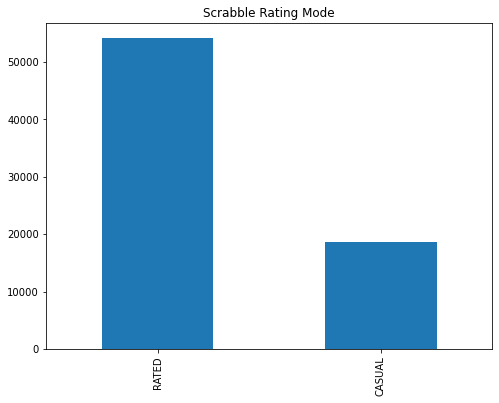

In [12]:
#The visualization shows the distribution of the "rating_mode" feature in the dataset.
df_games["rating_mode"].value_counts().plot.bar(figsize=(8, 6), title='Scrabble Rating Mode')
plt.show()

"Rated" and "Casual" are the two categories. With over 50,000 records as opposed to just under 20,000 for "Casual," the "Rated" category has a much higher number of records than the "Casual" category. This shows that "Rated" mode was used to play the majority of the games in the sample. As there can be variations in performance and player behaviour between the two modes, it may be crucial to take the amount of records that separate the two categories into account when training a machine learning model to predict ratings.

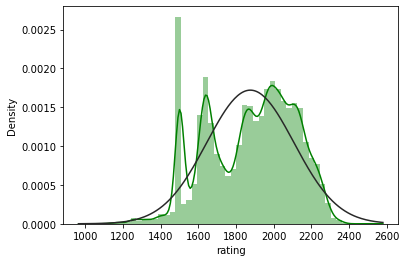

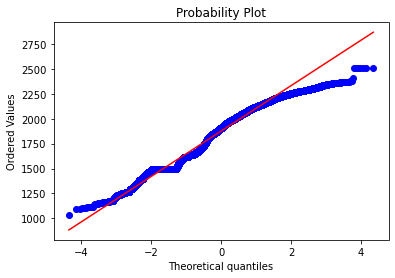

In [13]:
#In order to determine whether the target variable "rating" follows a normal distribution, we are attempting to
#investigate its distribution. Some machine learning techniques that presume normalcy may perform less well
#if the variable is not normally distributed. This knowledge can also be used to determine whether the target variable
#needs to be transformed to make it more regularly distributed.

from scipy import stats
#checking the rating prediction column
sns.distplot(df_train['rating'], fit=stats.norm, color='green')
fig = plt.figure()
res = stats.probplot(df_train['rating'], plot=plt) 

'Rating', the target variable's distribution in the training set, is shown in the first graph as a histogram. It displays the frequency with which each 'rating' value occurs throughout the dataset. The 'rating' value is represented on the x-axis, and the frequency of occurrence is shown on the y-axis. The graph demonstrates that the "rating" distribution is skewed to the right, indicating that the bulk of the ratings fall below average.

The probability plot in the second graph is used to determine if a variable is regularly distributed. The dataset's 'rating' distribution is compared to a normal distribution. The line on the graph indicates the values that would be predicted if "rating" followed a normal distribution, whereas the dots on the graph represent the actual values of "rating." If the dots fall close to the line, then 'rating' is normally distributed. From the graph, we can see that 'rating' is not normally distributed and deviates from the line in the tails, which indicates that it is skewed.

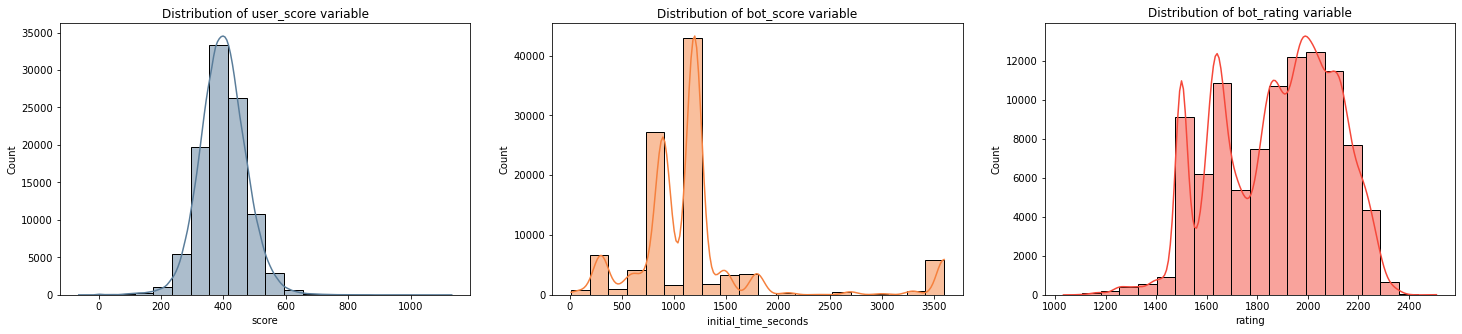

In [14]:
#Using the df_train DataFrame, this code generates a figure with three subplots, each of which displays 
#the distribution of a distinct variable. The plotted variables are rating, initial_time_seconds, and score.
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
colors = ["#5a7d9a", "#f5803d", "#f5483a"]
titles = ["Distribution of user_score variable", "Distribution of bot_score variable", "Distribution of bot_rating variable"]

for i, col in enumerate(["score", "initial_time_seconds", "rating"]):
    sns.histplot(ax=axes[i], x=df_train[col], bins=20, kde=True, color=colors[i]).set(title=titles[i])

plt.show()

A histogram with 20 bins is made for each variable, and a kernel density estimation (KDE) plot is placed on top of the histogram. The colours list is used to set the colour of each histogram, and the titles list is used to establish the titles for each subplot.

This code's goal is to visualise the distribution of these variables and learn more about their general distribution and form. If there are any outliers or strange patterns in the data, the histograms and KDE plots can reveal if the data is regularly distributed or skewed as well as their presence. Further analysis or modelling can be guided by this knowledge.

# Descriptive Analysis

In [15]:
#The statistical field of descriptive analysis deals with the summary of data. 
#In order to assist people comprehend what is in the data, it is used to explain and summarise data sets as well as
#to give a short glimpse of the data. Using summary statistics and graphical techniques, descriptive analysis entails
#characterising the central tendency, dispersion, and shape of the data. This study can be used to give a general 
#overview of a huge data set and to spot outliers, trends, and patterns. It is frequently employed in a variety of industries,
#including business, healthcare, and social sciences, to produce insights and help decision-making.
df_train.describe()

,game_id,score,rating,winner,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds
count,100820.000000,100820.000000,100820.000000,100820.000000,100820.000000,100820.000000,100820.000000,100820.000000
mean,36367.328605,399.029022,1875.592938,0.356834,1216.839218,0.269451,2.495219,492.455567
std,21020.288705,75.184778,231.791016,0.486627,713.039396,2.936508,3.358300,330.576928
min,1.000000,-64.000000,1033.000000,-1.000000,15.000000,0.000000,0.000000,19.764543
25%,18139.000000,352.000000,1664.000000,0.000000,900.000000,0.000000,1.000000,260.774724
50%,36339.500000,398.000000,1907.000000,0.000000,1200.000000,0.000000,1.000000,411.457795
75%,54625.000000,445.000000,2060.000000,1.000000,1200.000000,0.000000,1.000000,638.491383
max,72773.000000,1132.000000,2510.000000,1.000000,3600.000000,60.000000,10.000000,4444.821645


# Feature Engineering

In [16]:
df_train['nickname_length'] = df_train['nickname'].apply(len)
df_test['nickname_length'] = df_test['nickname'].apply(len)


# Add a feature for the difference in scores between the players
df_train['score_difference'] = abs(df_train['score'] - df_train['score'].shift(1))
df_train['score_difference'].fillna(0, inplace=True)

df_test['score_difference'] = abs(df_test['score'] - df_test['score'].shift(1))
df_test['score_difference'].fillna(0, inplace=True)

### Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
# label encoding
labelEnc = LabelEncoder()
for i in list(df_train.columns):
    if df_train[i].dtype == 'object':
        df_train[i] = labelEnc.fit_transform(df_train[i].astype(str))

In [18]:
# label encoding
labelEnc = LabelEncoder()
for i in list(df_test.columns):
    if df_test[i].dtype == 'object':
        df_test[i] = labelEnc.fit_transform(df_test[i].astype(str))

# Correlation

In [19]:
# corrleation
corr = df_train.corr()
corr

,game_id,nickname,score,rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,nickname_length,score_difference
game_id,1.000000,-0.001471,0.000306,0.002249,-0.002901,0.004071,-0.003154,0.006364,0.002552,-0.001448,0.002364,-0.002151,0.006068,-0.001493,0.004203,-0.001169,0.001081
nickname,-0.001471,1.000000,-0.058970,0.050715,0.437454,-0.097672,0.010510,-0.042193,-0.059291,0.076973,0.034930,0.013939,0.178636,-0.322511,0.090116,-0.014778,0.017687
score,0.000306,-0.058970,1.000000,0.425136,0.077558,0.049115,0.017091,0.026130,0.074923,-0.054822,0.061631,-0.001568,0.078056,-0.061679,0.001401,-0.051537,0.015781
rating,0.002249,0.050715,0.425136,1.000000,0.196825,0.037642,0.013311,0.003908,0.006003,-0.446454,0.149568,0.005766,0.405295,-0.434311,0.150011,0.126560,0.001877
first,-0.002901,0.437454,0.077558,0.196825,1.000000,-0.099036,0.014828,-0.004983,-0.055152,0.077776,0.037591,0.009877,0.175728,-0.324091,0.088075,0.022616,-0.005731
time_control_name,0.004071,-0.097672,0.049115,0.037642,-0.099036,1.000000,-0.025865,0.049786,0.059762,0.064378,0.413021,0.008444,-0.180740,0.167536,0.254900,-0.126172,-0.014544
game_end_reason,-0.003154,0.010510,0.017091,0.013311,0.014828,-0.025865,1.000000,-0.002710,-0.009068,-0.027628,-0.047581,-0.008789,0.050379,-0.023115,0.173089,-0.001591,0.000017
winner,0.006364,-0.042193,0.026130,0.003908,-0.004983,0.049786,-0.002710,1.000000,-0.012951,0.004350,0.026618,0.014037,-0.012810,0.086464,-0.029692,-0.034057,-0.176085
created_at,0.002552,-0.059291,0.074923,0.006003,-0.055152,0.059762,-0.009068,-0.012951,1.000000,0.017377,0.067499,-0.021622,-0.114586,0.167018,-0.024256,-0.090555,0.015796
lexicon,-0.001448,0.076973,-0.054822,-0.446454,0.077776,0.064378,-0.027628,0.004350,0.017377,1.000000,0.098226,0.014744,-0.052132,0.015611,0.059120,-0.066920,-0.038720


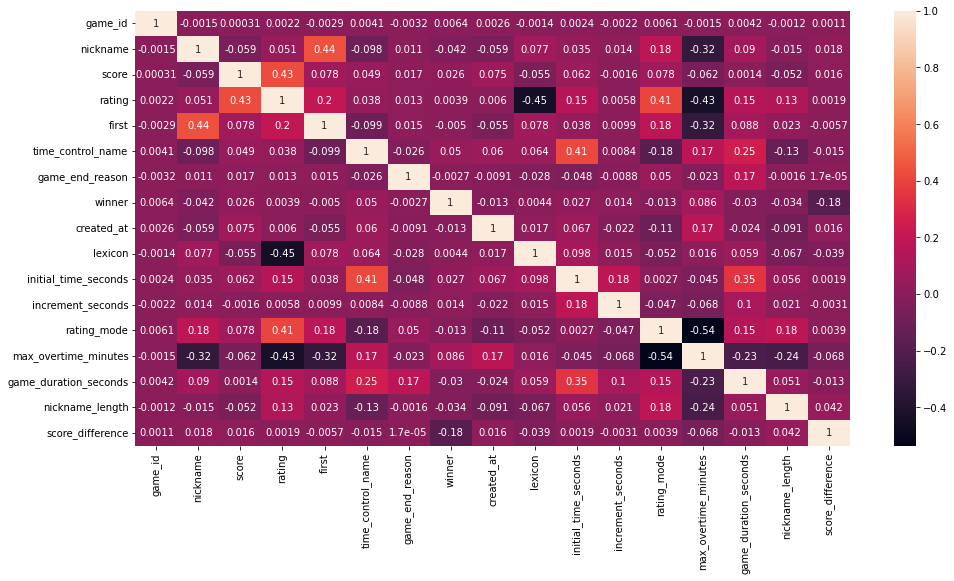

In [20]:
# correlation analysis
plt.figure(figsize=(16,8))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [21]:
# sorting values according to predictiona
print(corr["rating"].sort_values(ascending=False).to_string())

rating                   1.000000
score                    0.425136
rating_mode              0.405295
first                    0.196825
game_duration_seconds    0.150011
initial_time_seconds     0.149568
nickname_length          0.126560
nickname                 0.050715
time_control_name        0.037642
game_end_reason          0.013311
created_at               0.006003
increment_seconds        0.005766
winner                   0.003908
game_id                  0.002249
score_difference         0.001877
max_overtime_minutes    -0.434311
lexicon                 -0.446454


# Feature Selection

In [22]:
# Calculate ratio of initial_time_seconds to increment_seconds

# Calculate average score of past games for each player
df_train['avg_score'] = df_train.groupby('nickname')['score'].transform(lambda x: x.expanding().mean().shift(1))
df_test['avg_score'] = df_test.groupby('nickname')['score'].transform(lambda x: x.expanding().mean().shift(1))

# Calculate difference in average score between the player and their opponent's past games
df_train['opp_avg_score'] = df_train.groupby('game_id')['score'].transform(lambda x: x.iloc[0] - x.iloc[1])
df_test['opp_avg_score'] = df_test.groupby('game_id')['score'].transform(lambda x: x.iloc[0] - x.iloc[1])

# Calculate difference in initial_time_seconds and the average initial_time_seconds of the player's past games
df_train['avg_initial_time'] = df_train.groupby('nickname')['initial_time_seconds'].transform(lambda x: x.expanding().mean().shift(1))
df_test['avg_initial_time'] = df_test.groupby('nickname')['initial_time_seconds'].transform(lambda x: x.expanding().mean().shift(1))

In [23]:
# lets try to check the missing values of each column in a testing dataset 
df_train.isnull().sum()

game_id                     0
nickname                    0
score                       0
rating                      0
first                       0
time_control_name           0
game_end_reason             0
winner                      0
created_at                  0
lexicon                     0
initial_time_seconds        0
increment_seconds           0
rating_mode                 0
max_overtime_minutes        0
game_duration_seconds       0
nickname_length             0
score_difference            0
avg_score                1031
opp_avg_score               0
avg_initial_time         1031
dtype: int64

In [24]:
# Fill missing values with the mean
df_train['avg_score'].fillna(df_train['avg_score'].mean(), inplace=True)
df_test['avg_score'].fillna(df_test['avg_score'].mean(), inplace=True)

# Fill missing values with the mean
df_train['avg_initial_time'].fillna(df_train['avg_initial_time'].mean(), inplace=True)
df_test['avg_initial_time'].fillna(df_test['avg_initial_time'].mean(), inplace=True)

In [25]:
df_test = df_test.drop_duplicates(subset=["game_id"])
len(df_test)

22363

In [26]:
# Select relevant features
features = ['nickname_length', 'score_difference', 'time_control_name', 'rating_mode', 'avg_score', 'avg_initial_time']
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train['rating']

we added two new features to the dataset: nickname_length and score_difference. nickname_length is the length of the player's nickname, and score_difference is the absolute difference in scores between the players in each game. We also selected a subset of relevant features to use in the machine learning model.

In [27]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [28]:
# Create a list of models to train
models = [
    XGBRegressor()
]

In [29]:
# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(type(model).__name__)
    print('MAE:', mean_absolute_error(y_val, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_val, y_pred)))
    print('R2 score:', r2_score(y_val, y_pred))
    print()

XGBRegressor
MAE: 87.13146818282466
RMSE: 120.86336077295756
R2 score: 0.7272546430325518



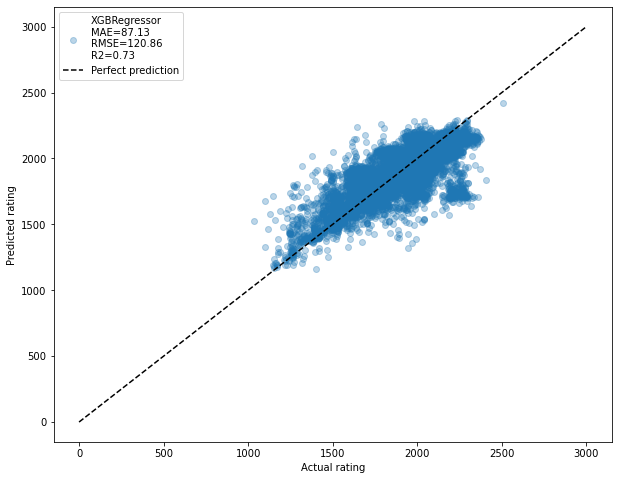

In [30]:
# Plot the results of the trained models
plt.figure(figsize=(10, 8))
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    plt.scatter(y_val, y_pred, alpha=0.3, label=f'{type(model).__name__}\nMAE={mae:.2f}\nRMSE={rmse:.2f}\nR2={r2:.2f}')
plt.plot([0, 3000], [0, 3000], 'k--', label='Perfect prediction')
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.legend()
plt.show()

In [31]:
import time
# importing the module
import tracemalloc
# starting time
start = time.time()
 # starting the monitoring
tracemalloc.start()

#choosing final model from above and predicting our values
final_model = XGBRegressor()
final_model.fit(X_train,y_train)


# end time
end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")
# displaying the memory
print(tracemalloc.get_traced_memory())
 # stopping the library
tracemalloc.stop()

Runtime of the program is 2.416964530944824
(17644, 3880710)


In [32]:
df_test = df_test.drop_duplicates(subset=["game_id"])
df_test.shape

(22363, 20)

In [33]:
#testing prediction
test_pred = final_model.predict(X_test)
test_pred

array([2044.4584, 2040.1505, 1689.6028, ..., 1826.1049, 2012.6771,
       1924.72  ], dtype=float32)

In [34]:
#sumbmission file
submission = pd.DataFrame({'game_id': df_test['game_id'].unique(), 'rating':test_pred})
submission.set_index('game_id', inplace=True)
submission.head()

,rating
game_id,
2,2044.458374
7,2040.150513
11,1689.602783
14,1661.022461
27,2031.749512


In [35]:
#sumbmission file
submission.to_csv('subissionXGBRegressor.csv')